In [ ]:
# 회귀 모델의 정확도를 높이는 과정 
# 단순선형 -> 다중 or 다항, 규제를 적용, DecisionTreeRegressor -> 앙상블(RF:랜덤포레스트)

In [1]:
import numpy as np
import pandas as pd

In [2]:
uselog = pd.read_csv('use_log.csv')
customer = pd.read_csv('customer_join.csv', encoding='cp949')

In [3]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [4]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [119]:
columns = ['mean', 'median', 'max', 'min', 'routine_flg', 'membership_period']

In [125]:
a = customer[customer['is_deleted']==0][columns].describe()

In [126]:
b = customer[customer['is_deleted']==1][columns].describe()

In [128]:
a

,mean,median,max,min,routine_flg,membership_period
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [129]:
b

,mean,median,max,min,routine_flg,membership_period
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [137]:
bar_columns = ['mean', 'min', '25%', '50%', '75%', 'max']

In [122]:
import matplotlib.pyplot as plt

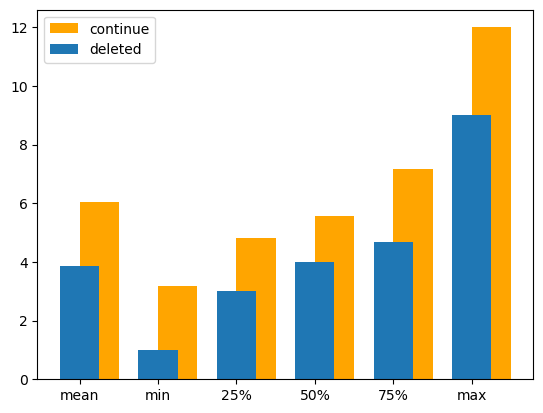

In [153]:
plt.bar(bar_columns, a['mean'][bar_columns].values, width=0.5, align='edge', color='orange', label='continue')
plt.bar(bar_columns, b['mean'][bar_columns].values, width=0.5, label='deleted')
plt.legend(loc='upper left')
plt.show()

In [9]:
cols = ['is_deleted', 'mean', 'median', 'max', 'min', 'routine_flg', 'membership_period']

In [10]:
customer[cols].head()

,is_deleted,mean,median,max,min,routine_flg,membership_period
0,0,4.833333,5.0,8,2,1,47
1,0,5.083333,5.0,7,3,1,47
2,0,4.583333,5.0,6,3,1,47
3,0,4.833333,4.5,7,2,1,47
4,0,3.916667,4.0,6,1,1,47


In [11]:
# 상관관계 확인
customer[cols].corr()

,is_deleted,mean,median,max,min,routine_flg,membership_period
is_deleted,1.000000,-0.569131,-0.598808,-0.432994,-0.430832,-0.634116,-0.538033
mean,-0.569131,1.000000,0.969125,0.821039,0.846385,0.404765,-0.250335
median,-0.598808,0.969125,1.000000,0.740221,0.806975,0.426179,-0.197160
max,-0.432994,0.821039,0.740221,1.000000,0.501662,0.439698,-0.157618
min,-0.430832,0.846385,0.806975,0.501662,1.000000,0.192393,-0.344113
routine_flg,-0.634116,0.404765,0.426179,0.439698,0.192393,1.000000,0.417811
membership_period,-0.538033,-0.250335,-0.197160,-0.157618,-0.344113,0.417811,1.000000


In [12]:
import matplotlib.pyplot as plt

In [13]:
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

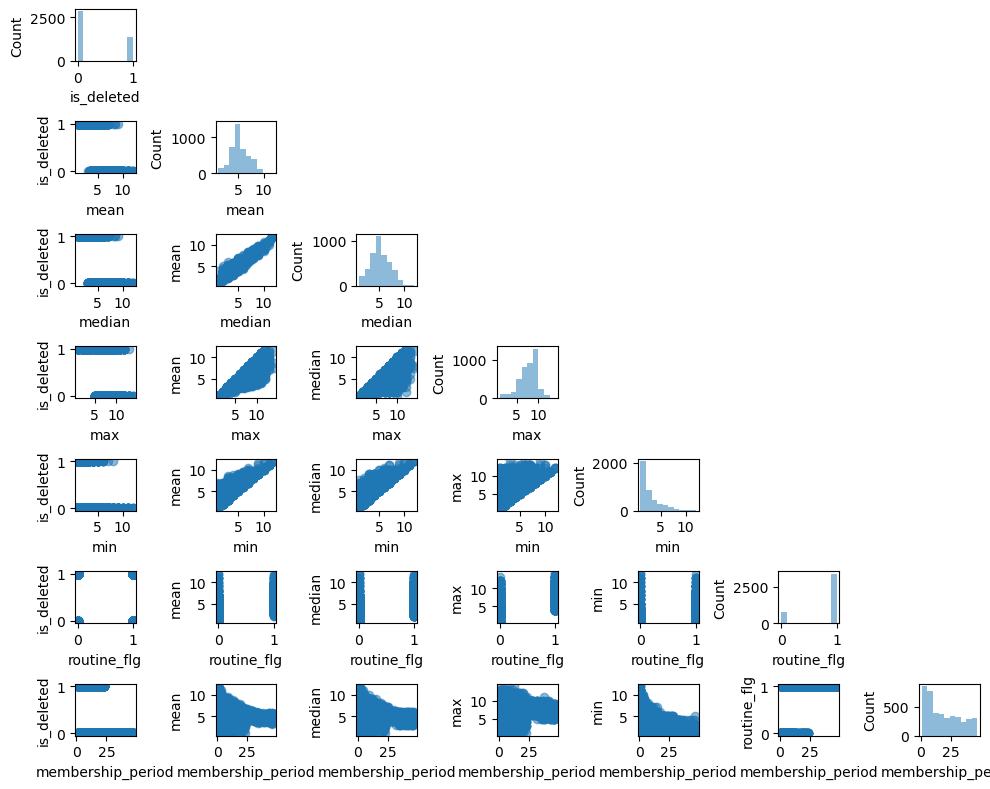

In [14]:
scatterplotmatrix(customer[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [49]:
np.corrcoef(customer[cols].values.T)

array([[ 1.        , -0.5691312 , -0.59880804, -0.43299397, -0.43083199,
        -0.6341162 , -0.53803307],
       [-0.5691312 ,  1.        ,  0.96912536,  0.82103863,  0.84638452,
         0.40476494, -0.25033452],
       [-0.59880804,  0.96912536,  1.        ,  0.74022089,  0.80697527,
         0.42617915, -0.19715991],
       [-0.43299397,  0.82103863,  0.74022089,  1.        ,  0.50166234,
         0.43969758, -0.15761788],
       [-0.43083199,  0.84638452,  0.80697527,  0.50166234,  1.        ,
         0.19239283, -0.34411263],
       [-0.6341162 ,  0.40476494,  0.42617915,  0.43969758,  0.19239283,
         1.        ,  0.41781106],
       [-0.53803307, -0.25033452, -0.19715991, -0.15761788, -0.34411263,
         0.41781106,  1.        ]])

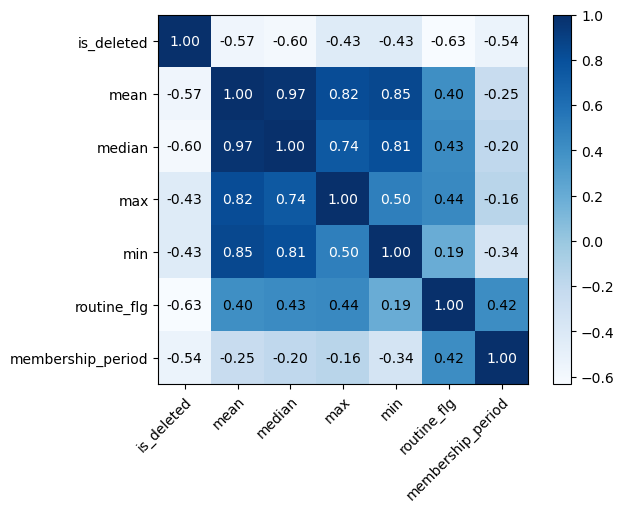

In [15]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(customer[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, cmap=plt.cm.Blues)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

### 선형 모델

In [18]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

In [19]:
uselog_months = uselog.groupby(["연월", 'customer_id'],as_index=False).count()

In [20]:
# usedate : 0 ~ 6 / 월요일 : 0, 화요일 : 1 ... 일요일 : 6
uselog_months.head()

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [21]:
# 고객이 연월에 몇번 사용했는지의 데이터
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [22]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame()

In [23]:
year_months

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [24]:
# 6부터 11까지 len(year_months) = 12
for i in range(6, len(year_months)):
    # 2018년 10월부터 2019년 3월까지의 데이터만
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    # count 칼럼 이름 변경
    tmp = tmp.rename(columns={"count":"count_pred"})

    # 1부터 6까지
    for j in range(1, 7):
        # 6개월 전부터 1개월 전까지
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
        tmp_before = tmp_before.rename(columns={"count":"count_{}".format(j-1)})
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

    # 6개월 전부터 1개월 전까지 데이터 결합
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [25]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18310 entries, 0 to 18309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연월           18310 non-null  object 
 1   customer_id  18310 non-null  object 
 2   count_pred   18310 non-null  int64  
 3   count_0      17793 non-null  float64
 4   count_1      17253 non-null  float64
 5   count_2      16711 non-null  float64
 6   count_3      16174 non-null  float64
 7   count_4      15667 non-null  float64
 8   count_5      15113 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [26]:
# Nan있는 데이터 버리기
predict_data = predict_data.dropna()

In [27]:
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
5,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
7,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [28]:
# reset_index(drop=True) : True로 설정하면 기존 인덱스를 데이터프레임의 열로 추가하지 않고 제거합니다
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [29]:
# 등록 일자 추가
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [30]:
# 데이터 타입 변경
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])

In [31]:
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01


In [32]:
# dateutil.relativedelta : 날짜와 시간 간의 상대적인 차이를 계산할 수 있는 기능을 제공
from dateutil.relativedelta import relativedelta

In [33]:
# period : 기간
predict_data["period"] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data.iloc[i, -1] = delta.years*12 + delta.months
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [35]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]

In [36]:
# 선형 모델
from sklearn import linear_model
import sklearn.model_selection

In [74]:
# X = 1개월 전 부터 6개월 전까지 이용횟수
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
# y = 이번달에 이용횟수
y = predict_data["count_pred"]

In [39]:
test = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period", "count_pred"]]

In [58]:
num = np.array([i for i in range(1702)]).reshape(-1, 1)

array([[   0],
       [   1],
       [   2],
       ...,
       [1699],
       [1700],
       [1701]])

In [47]:
test.corr()

,count_0,count_1,count_2,count_3,count_4,count_5,period,count_pred
count_0,1.000000,0.689825,0.642704,0.588403,0.476776,0.343829,0.016024,0.702825
count_1,0.689825,1.000000,0.676030,0.597170,0.485426,0.350796,-0.000104,0.666697
count_2,0.642704,0.676030,1.000000,0.630344,0.497718,0.386459,-0.045282,0.649913
count_3,0.588403,0.597170,0.630344,1.000000,0.519131,0.368000,-0.116693,0.616698
count_4,0.476776,0.485426,0.497718,0.519131,1.000000,0.380683,-0.154356,0.487732
count_5,0.343829,0.350796,0.386459,0.368000,0.380683,1.000000,-0.278328,0.361956
period,0.016024,-0.000104,-0.045282,-0.116693,-0.154356,-0.278328,1.000000,-0.007931
count_pred,0.702825,0.666697,0.649913,0.616698,0.487732,0.361956,-0.007931,1.000000


In [43]:
cols2=["count_0","count_1","count_2","count_3","count_4","count_5","period", "count_pred"]

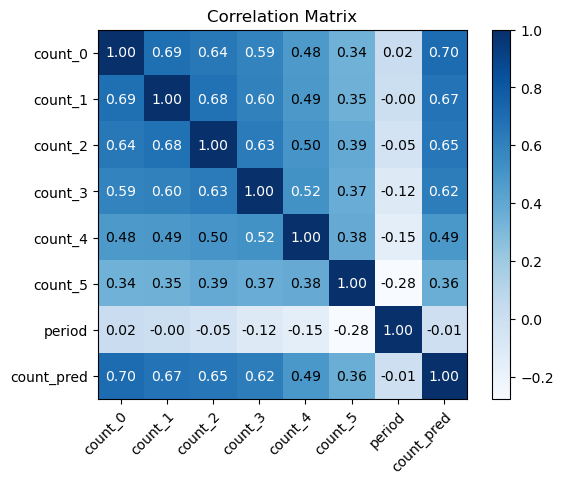

In [64]:
hm = heatmap(test.corr().values, row_names=cols2, column_names=cols2, cmap=plt.cm.Blues)

plt.title('Correlation Matrix')
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
test_std = sc.fit_transform(test)

In [70]:
test_std = pd.DataFrame(test_std)

In [72]:
test_std.head()

,0,1,2,3,4,5,6,7
0,-0.166711,-1.017129,-1.168218,0.247977,-1.897810,1.275225,-1.073002,-1.575449
1,0.219859,0.889428,1.188062,-0.165804,0.506591,0.224677,-1.073002,2.551535
2,0.219859,-1.017129,0.009922,-0.165804,0.025711,1.275225,-1.073002,-0.825088
3,-0.553281,0.126805,-0.382792,0.661758,1.468352,-0.300598,-1.073002,-1.200268
4,-0.939851,-0.254506,0.009922,-0.579586,-1.416930,-0.300598,-1.073002,-1.575449


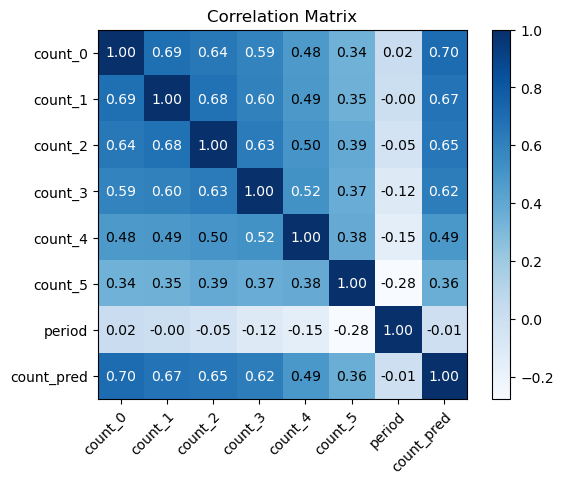

In [71]:
# 표준화를 해도 상관계수는 변하지 않는다
hm = heatmap(test_std.corr().values, row_names=cols2, column_names=cols2, cmap=plt.cm.Blues)

plt.title('Correlation Matrix')
plt.show()

In [76]:
sc2 = StandardScaler()

In [98]:
X_std = sc2.fit_transform(X)

In [101]:
y.values

array([ 1, 12,  3, ...,  7, 10,  8], dtype=int64)

In [110]:
X.head()

,count_0,count_1,count_2,count_3,count_4,count_5,period
49,5.0,3.0,3.0,7.0,3.0,10.0,5
55,6.0,8.0,9.0,6.0,8.0,8.0,5
56,6.0,3.0,6.0,6.0,7.0,10.0,5
72,4.0,6.0,5.0,8.0,10.0,7.0,5
96,3.0,5.0,6.0,5.0,4.0,7.0,5


In [108]:
y.values[:, np.newaxis]

array([[ 1],
       [12],
       [ 3],
       ...,
       [ 7],
       [10],
       [ 8]], dtype=int64)

In [102]:
y_std = sc2.fit_transform(y.values[:, np.newaxis]).flatten()

In [95]:
X_std

array([[-0.1667112 , -1.01712881, -1.16821829, ..., -1.89780984,
         1.27522507, -1.07300241],
       [ 0.21985891,  0.88942762,  1.18806162, ...,  0.50659119,
         0.22467663, -1.07300241],
       [ 0.21985891, -1.01712881,  0.00992166, ...,  0.02571099,
         1.27522507, -1.07300241],
       ...,
       [ 1.76613933,  0.50811633,  0.00992166, ...,  0.50659119,
        -0.8258718 ,  0.37410543],
       [ 1.76613933,  1.65205019,  1.18806162, ...,  0.50659119,
         0.74995085, -1.07300241],
       [ 0.60642901,  0.88942762,  0.40263498, ...,  0.9874714 ,
         0.74995085, -0.34944849]])

In [103]:
y_std

array([-1.5754488 ,  2.55153489, -0.82508813, ...,  0.67563321,
        1.80117422,  1.05081355])

In [96]:
# 선형 회귀
model = linear_model.LinearRegression()

In [93]:
del model

In [104]:
# 학습 데이터, 훈련 데이터 나누기
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_std, y_std, shuffle=True)
model.fit(X_train, y_train)

LinearRegression()

In [105]:
# 예측 확률 60% 정도
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6005105387036624
0.6235531772320317


In [106]:
# 기울기 확인
# 전 달에 같은 요일에 이용한 횟수가 가장 영향을 많이 끼침, 등록 기간은 거의 영향을 못끼친 모습
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.322437
1,count_1,0.183465
2,count_2,0.148169
3,count_3,0.163902
4,count_4,0.060035
5,count_5,0.053028
6,period,0.037731


In [107]:
0.322437 + 0.183465 + 0.148169 + 0.163902 + 0.060035 + 0.053028 + 0.037731

0.9687669999999998

In [111]:
sum(coef['coefficient'])

0.9687674765947659

다음 달의 이용 횟수 예측을 하기에는 모델 점수가 너무 낮음 <br>
다른 가설을 세워 고객의 요구사항에 응대해야 한다고 판단